# The FAT Stack

This document will soon describe the basic ideas behind the FAT investment management software by explaining the train of thought witch ignited the evolution of the concept.

For now it's a mess. :)

## Scratchpad

In [2]:
# We need the basic math module for log and exp functions
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print("*** The market environment:")
current_price = 100.
summit = 1442.
current_price_ln = math.log(current_price)
summit_ln = math.log(summit)
print("Current price: {0:.2f} ({1:f})".format(current_price, current_price_ln))
print("Summit: {0:.2f} ({1:f})".format(summit, summit_ln))



*** The market environment:
Current price: 100.00 (4.605170)
Summit: 1442.00 (7.273786)


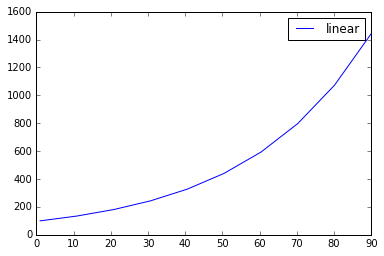

array([  100.        ,   134.51599172,   180.94552029,   243.40066109,
         327.41281312,   440.42259259,   592.43881818,   796.92495162,
        1071.99150194,  1442.        ])

In [30]:
y = np.linspace(current_price_ln, summit_ln, 10)
y = np.exp(y)
x = np.linspace(1,90,10)
# Plot the data
plt.plot(x, y, label='linear')

# Add a legend
plt.legend()

# Show the plot
plt.show()
y

In [ ]:
print("*** Strategy 1: Single order") 
delta = summit - current_price
ETH = 1.
USD = 0.


single_order = Order(summit, ETH)
print("Single order strategy:")
print(str(single_order))
print("Return: " + str(summit-current_price))
print("Interest: " + str(summit/current_price) + "\n")

steps = 2

price_step = delta / steps
print("Simple ladder:")
print("Delta: " + str(delta))
print("Price step: " + str(price_step))

v = ETH / steps
gain = 0
for i in range(steps):
    p = current_price + (i + 1) * price_step
    print(i+1, p, v)
    gain += p * v

print("Return: " + str(gain))

## Data structures

### Timeframe

A timeframe is ten minutes long. FAT is not high-frequency trader, this value seems reasonable if we want to store a large amount of meaningful trade data in memory.

In [2]:
ten_minutes = 1
one_hour = ten_minutes * 6
one_day = one_hour * 24
one_year = one_day * 365

"One year needs {} timeframes.".format(one_year)

'One year needs 52560 timeframes.'

The data we store in a Timeframe:

* Weighted avarage of the price [1f]
* Median of the price [1f]
* Volume [2f]
* Logarythmic regression (calculated as a linear regression over logarithmic values) [2f]
* Number of trades in the timeframe [1f]
* Volatility [2f]
* Min, Max (calculated as the dividing line between the upper and lower three percent of volume) [2f]

In [10]:
# Size calculation of market data memory usage
timeframe = {
    'weighted_average': 1,
    'median': 1,
    'volume': 2,
    'logline': 2,
    'trades': 1,
    'volatility': 2,
    'minmax': 2
}

timeframe_size = sum(timeframe.values()) * 8

print("One timeframe needs {} bytes.".format(timeframe_size))
print("One year of a market needs {:.2f} Mb of memory.".format(timeframe_size * float(one_year) / 2**20))

One timeframe needs 88 bytes.
One year of a market needs 4.41 Mb of memory.


## 1. Classes

1.1. The executable classes are:

* **Trader**, decribes a programmable trader, holds the system together.
* **Simulator**, decribes a programmable trader, holds the system together.
* **DataServer**, decribes a programmable trader, holds the system together.

1.2. Base classes

* **Instrument**, describes a financial instrument like a cryptocurrency.
* **Pair**, describes a trading pair, like one available on an exchange.
* **Exchange**, an entity that implements trading through an API between pairs.
* **Person**, owner of some of the money represented in the system.
* **Agent**, an automatic trader agent.

1.3. Member classes

* **Account**, user account information, like connection credentials to exchanges and wallets.
* **Wallet**, a balance of an instrument, on an exchange
* **Market**, a trading pair on an exchange.




### Instrument

The instrument class stores the following information:

* **code**, most used instrumet code, like "ETH", unique
* **name**, name, unique
* **alternative_codes**, list of alternative codes
* **alternative_names**, list of alternative names

The instrument class can provide information about the relations with other classes.

## Pair

A base-quote pair of two instruments.

## 2. Architecture

FAT is implemented as a set of modules designed to run in different processes.

* **Data Server**, collects and provides trade data.
* **Simulator**, simulates trades on historycal data and neural nets for predictions and trader training.
* **Trader**, manages accounts on echanges.

This separation of process has several benefits. **MISSING!**

**GUI** is implemented in-browser in javascript and can connect to all processes separately and in an orchestrated manner too.

### 2.1. Data server

The data server is backed up by a relational database. This is mainly to add a rich research toolset instantenously to the stack.

### 2.2. Simulator

Stores trade data only in timeframes. Can do strategy simulations, a analysis effectively.

### 2.3 Trader

Connects to exchanges and manages accounts.

## 3. Sugar mini language

Case insensitive for identifiers. A simple preprocessor that runs before python evaluates the expression.